In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\achra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
df = pd.read_csv(r"C:\Users\achra\Downloads\credit_dataset.csv\credit_dataset.csv")

In [7]:
df.drop(labels = ['Unnamed: 0','ID'], axis =1, inplace= True)

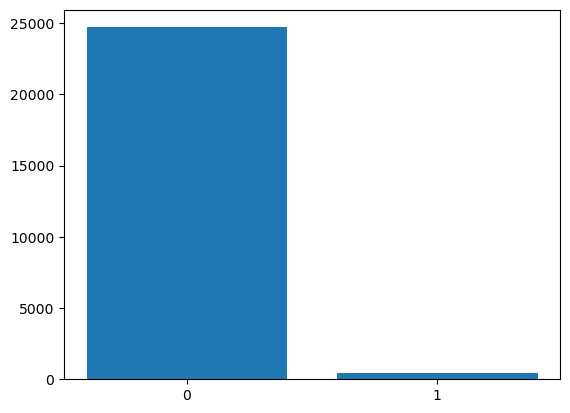

In [8]:
plt.bar(df['TARGET'].value_counts().index, df['TARGET'].value_counts().values)
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

In [67]:
#!pip install imbalanced-learn
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#import imbalanced-learn
X = df.drop(labels = 'TARGET', axis = 1)
y = df['TARGET']


categorical_columns = [column for column in X.columns if X[column].dtype == 'object']
numeric_columns = [column for column in X.columns if X[column].dtype in ('int64', 'float64')]

numeric_transformer = SimpleImputer(strategy = 'median')

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehotencoder', OneHotEncoder(handle_unknown= 'ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

X_processed = full_pipeline.fit_transform(X)
feature_names = (numeric_columns + 
                 full_pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehotencoder']
                 .get_feature_names_out(categorical_columns).tolist())
X_processed_df = pd.DataFrame(X_processed, columns = feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, train_size = 0.8, random_state = 42)
neg_pos_ratio = sum(y_train == 0) / sum(y_train == 1)
model = XGBClassifier(scale_pos_weight=neg_pos_ratio)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(f1_score(y_test,predictions))
cm = confusion_matrix(y_test, predictions)

tn, fp, fn, tp = cm.ravel()

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
#model = XGBClassifier()
#model.fit(X_train, y_train)


0.9631987268748756
0.16778523489932887
0.29069767441860467
0.2127659574468085
True Positives: 25
False Positives: 124
True Negatives: 4817
False Negatives: 61


## Metrics without class imbalance treatment
#### Train Set
    Accuracy: 99.2%
    Precision: 99.44%
    Recall: 52.68%
    f1_score: 68.87%
#### Test Set
    Accuracy: 98.23%
    Precision: 42.11%
    Recall: 9.30%
    f1_score: 15.24%
    
    True Positives: 8
    False Positives: 11
    True Negatives: 4930
    False Negatives: 78


# Naive Oversampling

In [29]:
from imblearn.over_sampling import RandomOverSampler
import sklearn
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_random_oversampled, y_train_random_oversampled = ros.fit_resample(X_train, y_train)
model.fit(X_train_random_oversampled, y_train_random_oversampled)
print('Train Set')
random_oversampled_train_predictions = model.predict(X_train_random_oversampled)
print(accuracy_score(y_train_random_oversampled, random_oversampled_train_predictions))
print(precision_score(y_train_random_oversampled,random_oversampled_train_predictions))
print(recall_score(y_train_random_oversampled,random_oversampled_train_predictions))
print(f1_score(y_train_random_oversampled,random_oversampled_train_predictions))

print('Test Set')

random_oversampled_test_predictions = model.predict(X_test)
print(accuracy_score(y_test, random_oversampled_test_predictions))
print(precision_score(y_test,random_oversampled_test_predictions))
print(recall_score(y_test,random_oversampled_test_predictions))
print(f1_score(y_test,random_oversampled_test_predictions))

cm_random_oversampling = confusion_matrix(y_test, random_oversampled_test_predictions)

tn_ros, fp_ros, fn_ros, tp_ros = cm_random_oversampling.ravel()

print(f"True Positives: {tp_ros}")
print(f"False Positives: {fp_ros}")
print(f"True Negatives: {tn_ros}")
print(f"False Negatives: {fn_ros}")

Train Set
0.9917050225077133
0.9836807801383154
1.0
0.9917732631050916
Test Set
0.9635965784762284
0.145985401459854
0.23255813953488372
0.179372197309417
True Positives: 20
False Positives: 117
True Negatives: 4824
False Negatives: 66


## Metrics with Random Oversampling
#### Train Set
    Accuracy: 99.2%
    Precision: 98.44%
    Recall: 100%
    f1_score: 99.2%%
#### Test Set
    Accuracy: 98.23%
    Precision: 14.59%
    Recall: 23.26%
    f1_score: 17.94%
    
    True Positives: 20
    False Positives: 117
    True Negatives: 4824
    False Negatives: 66

# Naive Undersampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_random_undersampled, y_train_random_undersampled = rus.fit_resample(X_train, y_train)

model.fit(X_train_random_undersampled, y_train_random_undersampled)

print('Train Set')
random_undersampled_train_predictions = model.predict(X_train_random_undersampled)
print(f"Accuracy: {accuracy_score(y_train_random_undersampled, random_undersampled_train_predictions)}")
print(f"Precision: {precision_score(y_train_random_undersampled, random_undersampled_train_predictions)}")
print(f"Recall: {recall_score(y_train_random_undersampled, random_undersampled_train_predictions)}")
print(f"F1 Score: {f1_score(y_train_random_undersampled, random_undersampled_train_predictions)}")

print('Test Set')
random_undersampled_test_predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, random_undersampled_test_predictions)}")
print(f"Precision: {precision_score(y_test, random_undersampled_test_predictions)}")
print(f"Recall: {recall_score(y_test, random_undersampled_test_predictions)}")
print(f"F1 Score: {f1_score(y_test, random_undersampled_test_predictions)}")

cm_random_undersampling = confusion_matrix(y_test, random_undersampled_test_predictions)

tn_rus, fp_rus, fn_rus, tp_rus = cm_random_undersampling.ravel()

# Print the confusion matrix statistics
print(f"True Positives: {tp_rus}")
print(f"False Positives: {fp_rus}")
print(f"True Negatives: {tn_rus}")
print(f"False Negatives: {fn_rus}")

Train Set
Accuracy: 0.9985119047619048
Precision: 1.0
Recall: 0.9970238095238095
F1 Score: 0.9985096870342772
Test Set
Accuracy: 0.6202506465088522
Precision: 0.03184386235233693
Recall: 0.7209302325581395
F1 Score: 0.06099360550909985
True Positives: 62
False Positives: 1885
True Negatives: 3056
False Negatives: 24


## Metrics with Random Undersampling
#### Train Set
    Accuracy: 99.85%
    Precision: 100%
    Recall: 99.7%
    f1_score: 99.8%%
#### Test Set
    Accuracy: 62.03%
    Precision: 3.18%
    Recall: 72.1%
    f1_score: 6.1%
    
    True Positives: 62
    False Positives: 1885
    True Negatives: 3056
    False Negatives: 24

# SMOTE

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1, random_state=42)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
model.fit(X_train_SMOTE, y_train_SMOTE)
print('Train Set')
SMOTE_train_predictions = model.predict(X_train_SMOTE)
print(accuracy_score(y_train_SMOTE, SMOTE_train_predictions))
print(precision_score(y_train_SMOTE,SMOTE_train_predictions))
print(recall_score(y_train_SMOTE,SMOTE_train_predictions))
print(f1_score(y_train_SMOTE,SMOTE_train_predictions))

print('Test Set')

SMOTE_test_predictions = model.predict(X_test)
print(accuracy_score(y_test, SMOTE_test_predictions))
print(precision_score(y_test,SMOTE_test_predictions))
print(recall_score(y_test,SMOTE_test_predictions))
print(f1_score(y_test,SMOTE_test_predictions))

cm_SMOTE = confusion_matrix(y_test, SMOTE_test_predictions)

tn_SMOTE, fp_SMOTE, fn_SMOTE, tp_SMOTE = cm_SMOTE.ravel()

print(f"True Positives: {tp_SMOTE}")
print(f"False Positives: {fp_SMOTE}")
print(f"True Negatives: {tn_SMOTE}")
print(f"False Negatives: {fn_SMOTE}")

Train Set
0.9952708512467756
0.9979151835655447
0.9926154468666228
0.9952582600096356
Test Set
0.9814999005370997
0.34782608695652173
0.09302325581395349
0.14678899082568808
True Positives: 8
False Positives: 15
True Negatives: 4926
False Negatives: 78


## Metrics with SMOTE
#### Train Set
    Accuracy: 99.52%
    Precision: 99.79%
    Recall: 99.26%
    f1_score: 99.52%
#### Test Set
    Accuracy: 98.15%
    Precision: 34.78%
    Recall: 9.31%
    f1_score: 14.67%
    
    True Positives: 8
    False Positives: 15
    True Negatives: 4926
    False Negatives: 78

# ADASYN

In [68]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy = 0.9,random_state=42)

X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)
model.fit(X_train_ADASYN, y_train_ADASYN)

print('Train Set')
ADASYN_train_predictions = model.predict(X_train_ADASYN)
print(accuracy_score(y_train_ADASYN, ADASYN_train_predictions))
print(precision_score(y_train_ADASYN, ADASYN_train_predictions))
print(recall_score(y_train_ADASYN, ADASYN_train_predictions))
print(f1_score(y_train_ADASYN, ADASYN_train_predictions))

print('Test Set')
ADASYN_test_predictions = model.predict(X_test)
print(accuracy_score(y_test, ADASYN_test_predictions))
print(precision_score(y_test, ADASYN_test_predictions))
print(recall_score(y_test, ADASYN_test_predictions))
print(f1_score(y_test, ADASYN_test_predictions))

cm_ADASYN = confusion_matrix(y_test, ADASYN_test_predictions)

tn_ADASYN, fp_ADASYN, fn_ADASYN, tp_ADASYN = cm_ADASYN.ravel()

print(f"True Positives: {tp_ADASYN}")
print(f"False Positives: {fp_ADASYN}")
print(f"True Negatives: {tn_ADASYN}")
print(f"False Negatives: {fn_ADASYN}")

Train Set
0.9840897582815873
0.9674641669845768
1.0
0.9834630619650425
Test Set
0.9480803660234732
0.13389121338912133
0.37209302325581395
0.1969230769230769
True Positives: 32
False Positives: 207
True Negatives: 4734
False Negatives: 54


## Metrics with ADASYN
#### Train Set
    Accuracy: 99.54%
    Precision: 99.80%
    Recall: 99.28%
    f1_score: 99.54%
#### Test Set
    Accuracy: 98.23%
    Precision: 44.00%
    Recall: 12.79%
    f1_score: 19.82%
    
    True Positives: 11
    False Positives: 14
    True Negatives: 4927
    False Negatives: 75

# Tomek Links

In [69]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()

X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)
model.fit(X_train_tomek, y_train_tomek)

print('Train Set')
tomek_train_predictions = model.predict(X_train_tomek)
print(accuracy_score(y_train_tomek, tomek_train_predictions))
print(precision_score(y_train_tomek, tomek_train_predictions))
print(recall_score(y_train_tomek, tomek_train_predictions))
print(f1_score(y_train_tomek, tomek_train_predictions))

print('Test Set')
tomek_test_predictions = model.predict(X_test)
print(accuracy_score(y_test, tomek_test_predictions))
print(precision_score(y_test, tomek_test_predictions))
print(recall_score(y_test, tomek_test_predictions))
print(f1_score(y_test, tomek_test_predictions))

cm_tomek = confusion_matrix(y_test, tomek_test_predictions)

tn_tomek, fp_tomek, fn_tomek, tp_tomek = cm_tomek.ravel()

print(f"True Positives: {tp_tomek}")
print(f"False Positives: {fp_tomek}")
print(f"True Negatives: {tn_tomek}")
print(f"False Negatives: {fn_tomek}")


Train Set
0.9871980797119568
0.5675675675675675
1.0
0.7241379310344828
Test Set
0.9643922816789338
0.17482517482517482
0.29069767441860467
0.21834061135371177
True Positives: 25
False Positives: 118
True Negatives: 4823
False Negatives: 61


## Metrics with Tomek Links
#### Train Set
    Accuracy: 99.23%
    Precision: 100.00%
    Recall: 54.46%
    f1_score: 70.52%
#### Test Set
    Accuracy: 98.29%
    Precision: 50.00%
    Recall: 9.30%
    f1_score: 15.69%
    
    True Positives: 8
    False Positives: 8
    True Negatives: 4933
    False Negatives: 78